In [ ]:
!pip install basedosdados

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import basedosdados as bd
import re
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree, export_graphviz, export_text
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [41]:
query = """
    SELECT
    dados.id as id,
    dados.title as title,
    dados.link as link,
    dados.year as year,
    dados.duration as duration,
    dados.rating_mpa as rating_mpa,
    dados.rating_imdb as rating_imdb,
    dados.vote as vote,
    dados.budget as budget,
    dados.gross_world_wide as gross_world_wide,
    dados.gross_us_canada as gross_us_canada,
    dados.gross_opening_weekend as gross_opening_weekend,
    dados.director as director,
    dados.writer as writer,
    dados.star as star,
    dados.genre as genre,
    dados.country_origin as country_origin,
    dados.filming_location as filming_location,
    dados.production_company as production_company,
    dados.language as language,
    dados.win as win,
    dados.nomination as nomination,
    dados.oscar as oscar
FROM `basedosdados.world_imdb_movies.top_movies_per_year` AS dados
"""
rating_mpa
vote
gross_us_canada
gross_opening_weekend
star
country_origin
df = bd.read_sql(query, billing_project_id="e-health-416317")
df.head(1)

Downloading: 100%|██████████|


,id,title,link,year,duration,rating_mpa,rating_imdb,vote,budget,gross_world_wide,...,writer,star,genre,country_origin,filming_location,production_company,language,win,nomination,oscar
0,tt0073470,Strip Nude for Your Killer,https://www.imdb.com/title/tt0073470,1975,1h 38m,Not Rated,5.6,33000,NaN,NaN,...,"Andrea Bianchi, Massimo Felisatti","Edwige Fenech, Nino Castelnuovo, Femi Benussi","Erotic Thriller, Giallo, Slasher Horror, Horro...",Italy,"Milan, Lombardia, Italy",FRAL Cinematografica,Italian,0,0,0


In [42]:
def extract_duration_minutes(duration_str):
    if pd.isna(duration_str):
        return 0.0

    hours = 0
    minutes = 0

    hour_match = re.search(r'(\d+)h', str(duration_str))
    if hour_match:
        hours = int(hour_match.group(1))

    minute_match = re.search(r'(\d+)m', str(duration_str))
    if minute_match:
        minutes = int(minute_match.group(1))

    return hours * 60 + minutes

df['duration_minutes'] = df['duration'].apply(extract_duration_minutes)

print("Exemplos de conversão de duração:")
df[['duration', 'duration_minutes']].head()

Exemplos de conversão de duração:


,duration,duration_minutes
0,1h 38m,98.0
1,1h 30m,90.0
2,1h 30m,90.0
3,1h 49m,109.0
4,1h 15m,75.0


In [43]:
df.dropna(subset=['budget', 'gross_world_wide'], inplace=True)

Distribuição de filmes por categoria de avaliação:
rating_category
médio    5324
baixo    3131
alto      951
Name: count, dtype: int64


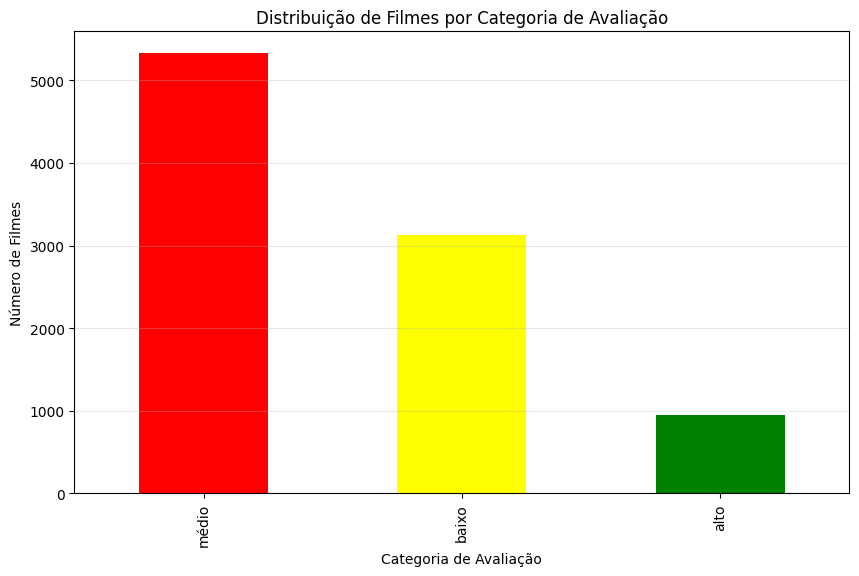

In [44]:
df['rating_category'] = pd.cut(df['rating_imdb'],
                              bins=[0, 6.0, 7.5, 10.0],
                              labels=['baixo', 'médio', 'alto'])

rating_counts = df['rating_category'].value_counts()
print("Distribuição de filmes por categoria de avaliação:")
print(rating_counts)

plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', color=['red', 'yellow', 'green'])
plt.title('Distribuição de Filmes por Categoria de Avaliação')
plt.xlabel('Categoria de Avaliação')
plt.ylabel('Número de Filmes')
plt.grid(axis='y', alpha=0.3)
plt.show()

In [59]:
# Definir X e y
X = df[['budget', 'gross_world_wide', 'duration_minutes','vote','gross_us_canada','gross_opening_weekend']] 
y = df['rating_category']  # Alvo (categorias de avaliação)

In [55]:
print('Tamanho de X: ', X.shape, '\n')
print('Tamanho de y: ', y.shape, '\n')

Tamanho de X:  (9406, 7) 

Tamanho de y:  (9406,) 



In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=123)

In [61]:
print('Tamanho de X_train: ', X_train.shape, '\n')
print('Tamanho de X_test: ', X_test.shape, '\n')
print('Tamanho de y_train: ', y_train.shape, '\n')
print('Tamanho de y_test: ', y_test.shape, '\n')

Tamanho de X_train:  (7995, 6) 

Tamanho de X_test:  (1411, 6) 

Tamanho de y_train:  (7995,) 

Tamanho de y_test:  (1411,) 



In [70]:

treeIMDb = DecisionTreeClassifier(max_depth=15, min_samples_split=20, random_state=123)
treeIMDb.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, min_samples_split=20, random_state=123)

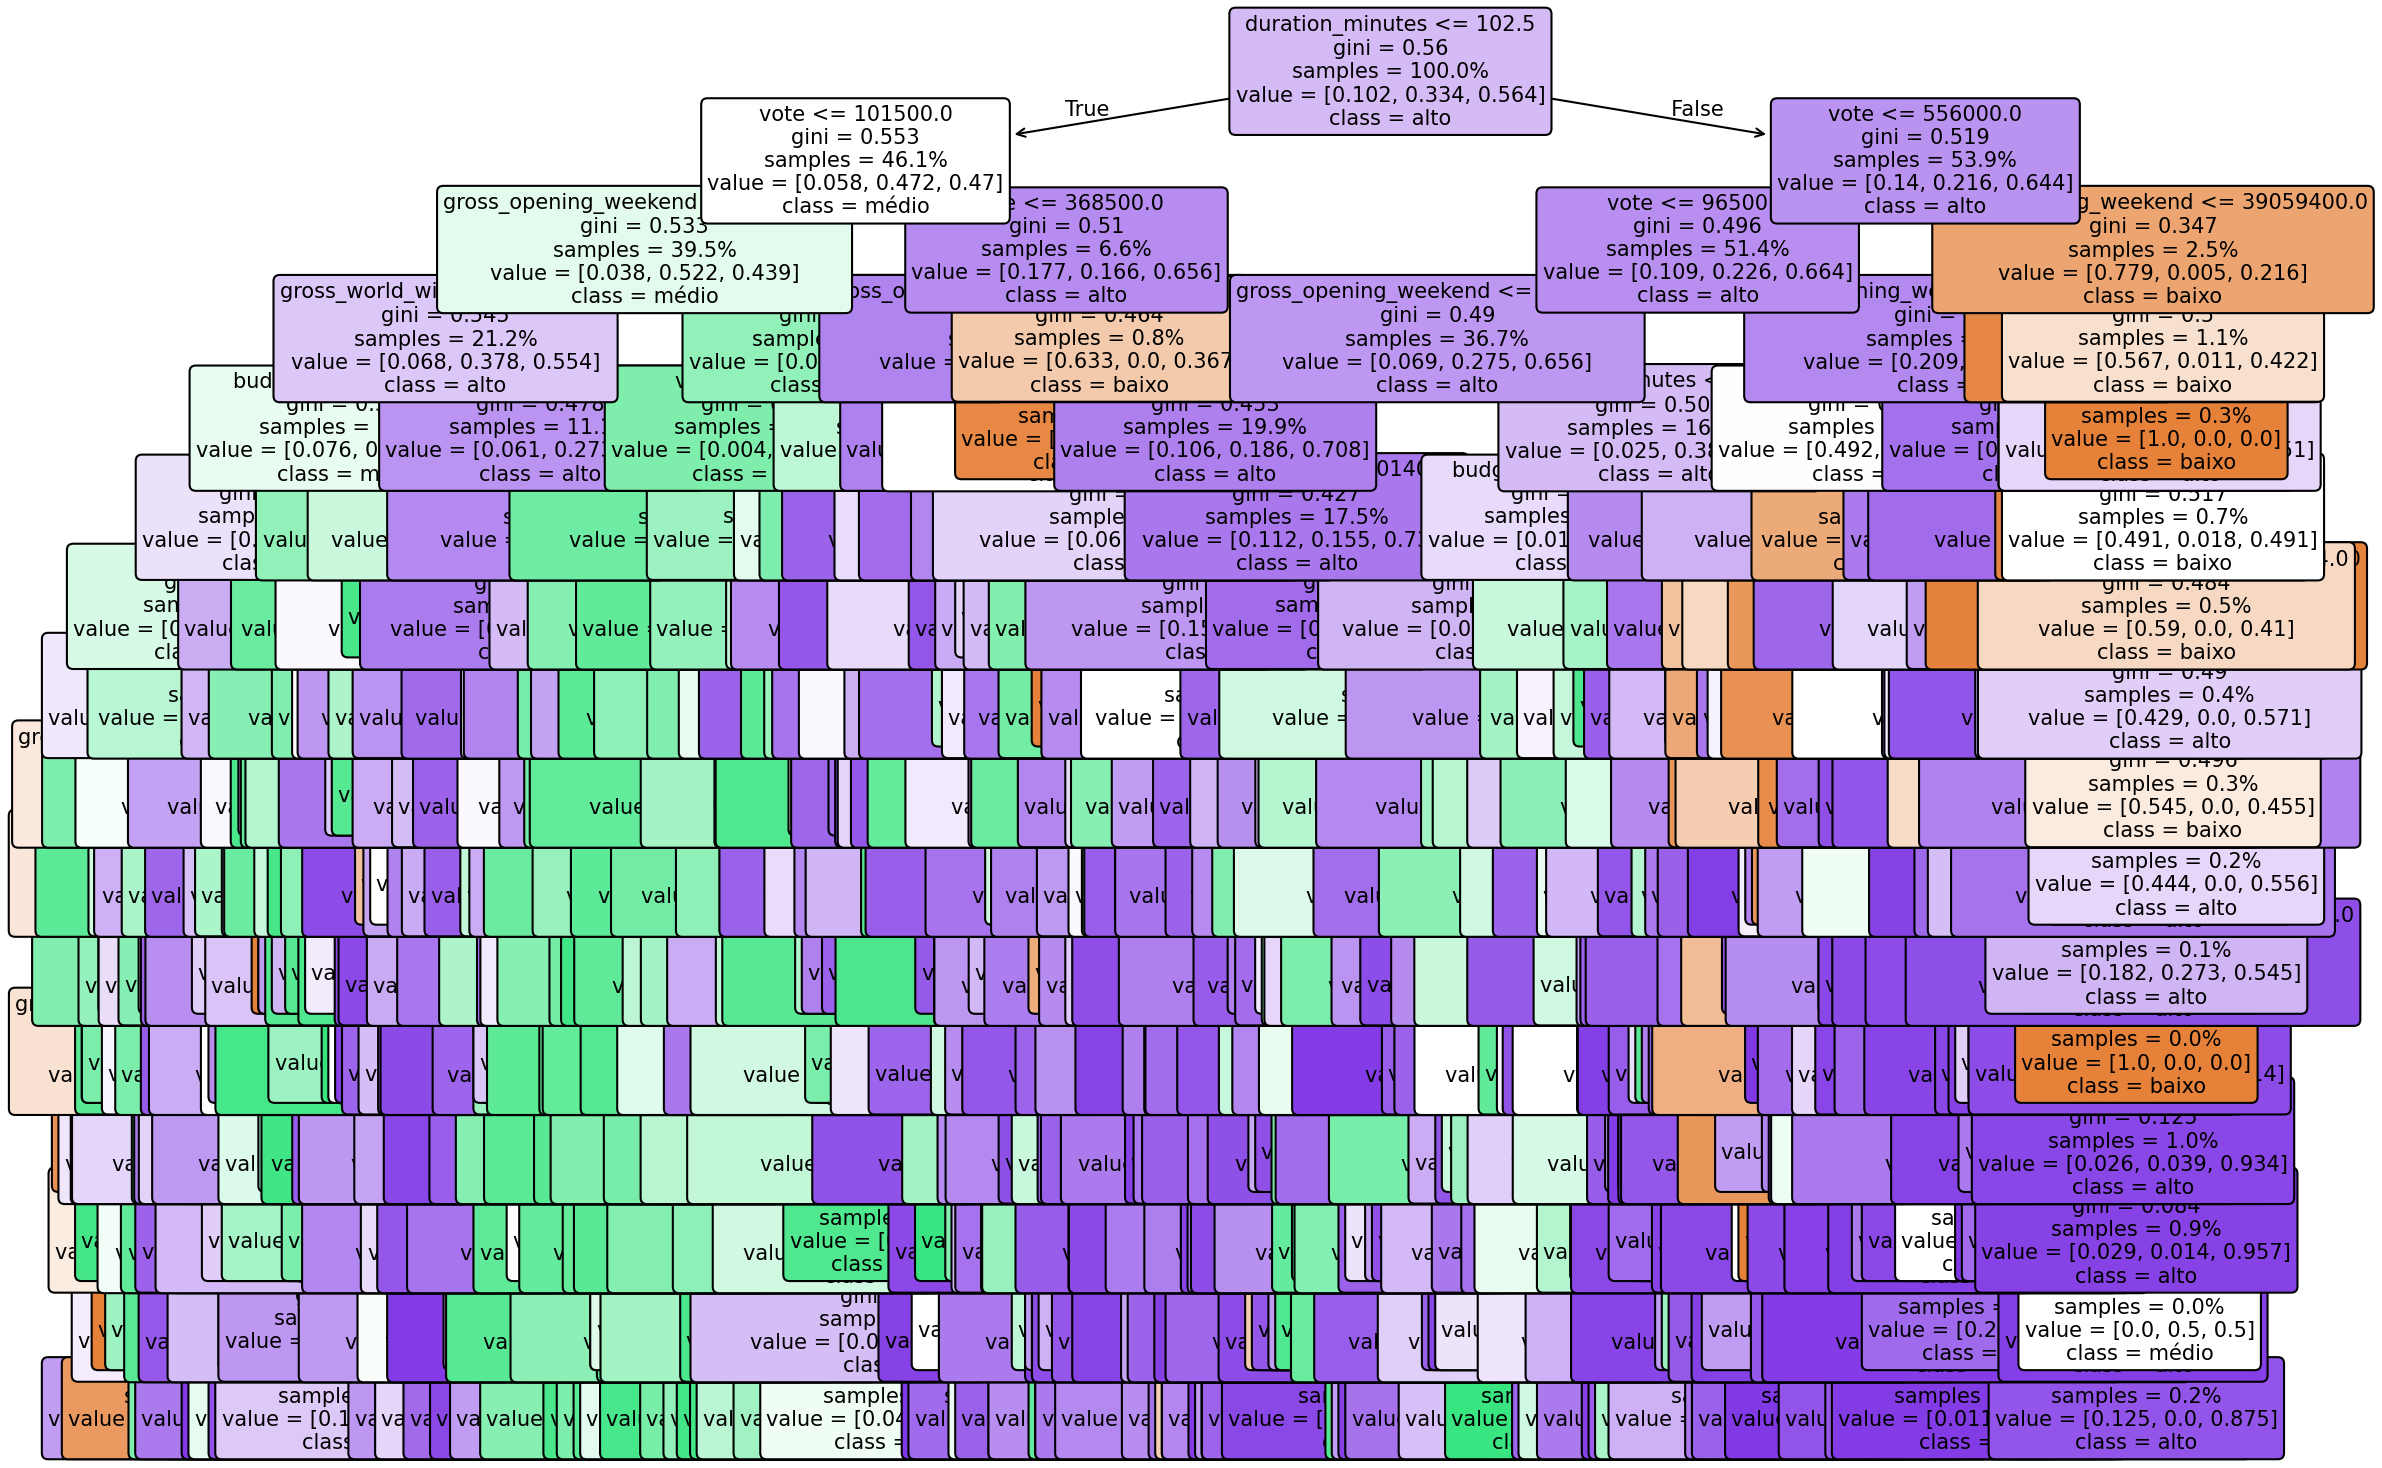

In [71]:
fig, ax = plt.subplots(figsize=(16, 10), dpi=150)
plot_tree(
    treeIMDb,
    ax=ax,
    feature_names=X.columns,
    class_names=y.cat.categories,
    filled=True,
    rounded=True,
    proportion=True,
    fontsize=10
)
plt.tight_layout()
plt.show()

In [72]:
print(export_text(treeIMDb, feature_names=list(X.columns), spacing=5))

|----- duration_minutes <= 102.50
|     |----- vote <= 101500.00
|     |     |----- gross_opening_weekend <= 416292.50
|     |     |     |----- gross_world_wide <= 293362.00
|     |     |     |     |----- budget <= 2250000.00
|     |     |     |     |     |----- vote <= 991.50
|     |     |     |     |     |     |----- vote <= 117.50
|     |     |     |     |     |     |     |----- budget <= 82500.00
|     |     |     |     |     |     |     |     |----- class: médio
|     |     |     |     |     |     |     |----- budget >  82500.00
|     |     |     |     |     |     |     |     |----- gross_opening_weekend <= 2273.00
|     |     |     |     |     |     |     |     |     |----- class: baixo
|     |     |     |     |     |     |     |     |----- gross_opening_weekend >  2273.00
|     |     |     |     |     |     |     |     |     |----- gross_opening_weekend <= 45264.00
|     |     |     |     |     |     |     |     |     |     |----- budget <= 1440250.00
|     |     |     |     |  

In [73]:

y_train_true = y_train
y_train_pred = treeIMDb.predict(X_train)
y_test_true = y_test
y_test_pred = treeIMDb.predict(X_test)


print(f"Acurácia de Treino: {round(accuracy_score(y_train_true, y_train_pred), 2)}")
print('\n ---------------------------\n')
print(f"Acurácia de Teste: {round(accuracy_score(y_test_true, y_test_pred), 2)}")

Acurácia de Treino: 0.82

 ---------------------------

Acurácia de Teste: 0.63


In [74]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_test_pred)
print("Matriz de Confusão:")
print(cm)

Matriz de Confusão:
[[ 51   7  74]
 [ 11 252 199]
 [ 51 183 583]]
